<a href="https://colab.research.google.com/github/MochNad/Pembelajaran-Mesin/blob/main/Quiz1_(Kelompok4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada datasetMNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

In [3]:
# menghitung berapa kali setiap label muncul
label_counts = np.bincount(mnist.target.astype(int))

# print label angka
for index, value in enumerate(label_counts):
    print(f'nilai {index} = {value}')

nilai 0 = 6903
nilai 1 = 7877
nilai 2 = 6990
nilai 3 = 7141
nilai 4 = 6824
nilai 5 = 6313
nilai 6 = 6876
nilai 7 = 7293
nilai 8 = 6825
nilai 9 = 6958


# 2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapatmenggunakan referensi dari Job Sheet 03.

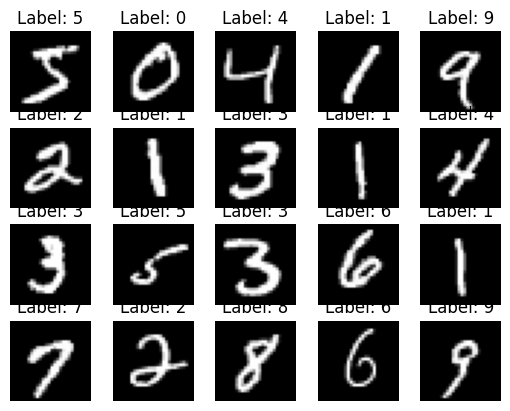

In [28]:
images = mnist.data
labels = mnist.target.astype(int)

# mendefinisikan 15 citra
num_images_to_display = 20
# menampilkan 15 citra pertama
for i in range(num_images_to_display):
    plt.subplot(4, 5, i + 1)
    image = images.iloc[i].values.reshape(28, 28)  # Reshape the image
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.show()

# 3. Lakukan proses ekstraksi fi tur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk

*   Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
*   Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

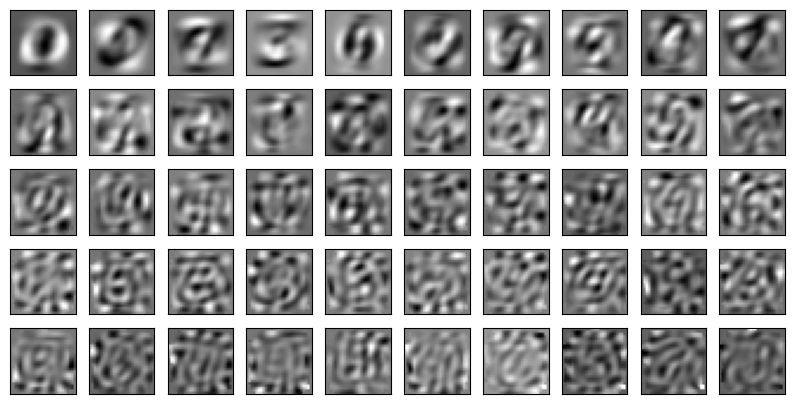

In [24]:
from sklearn.decomposition import PCA

X=mnist.data.astype('float64')
y = mnist.target

# standarisasi data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / (std + 1e-8)

# mengurangi dimensi data menjadi 50 komponen utama
n_components = 50
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)


fig, axes = plt.subplots(5, 10, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

# 4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [6]:
from sklearn.model_selection import train_test_split

X=mnist.data.astype('float64')
y = mnist.target

In [7]:
# rasio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# rasio 90:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# 5. Lakukan proses klasifi kasi dengan menggunakan algoritma Naive Bayes dan SVM.


*   Anda diperbolehkan untuk melakukan tunning parameter.
*   Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Inisiasi SVM
svm = SVC(kernel='rbf', C=1.0)

# fit model
svm.fit(X_train, y_train)

# prediksi dengan data training
train_preds_svm = svm.predict(X_train)

# prediksi dengan data testing
test_preds_svm = svm.predict(X_test)


# klasifikasi algoritma Naive Bayes
# Inisiasi GaussianNB
nb = GaussianNB()

# fit model
nb.fit(X_train, y_train)

# prediksi dengan data training
train_preds_nb = nb.predict(X_train)

# prediksi dengan data testing
test_preds_nb = nb.predict(X_test)

# 6. Evaluasi model yang Anda buat terhadap data training dan data testing.

*   Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
*   Gunakan fungsi classifi cation_report untuk mengetahui performa model secara holistik.
*   Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

In [12]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [13]:
# evaluasi akurasi data train SVM
train_accuracy_svm = accuracy_score(y_train, train_preds_svm)
# evaluasi akurasi data test SVM
test_accuracy_svm = accuracy_score(y_test, test_preds_svm)

# classification report
train_report_svm = classification_report(y_train, train_preds_svm)
test_report_svm = classification_report(y_test, test_preds_svm)

print("Train Accuracy ", train_accuracy_svm)
print("Test Accuracy ", test_accuracy_svm)
print("Train Classification Report ")
print(train_report_svm)
print("Test Classification Report")
print(test_report_svm)

Train Accuracy  0.9902222222222222
Test Accuracy  0.975
Train Classification Report 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6220
           1       0.99      1.00      0.99      7077
           2       0.99      0.99      0.99      6316
           3       0.99      0.99      0.99      6381
           4       0.99      0.99      0.99      6213
           5       0.99      0.99      0.99      5655
           6       0.99      1.00      0.99      6199
           7       0.99      0.99      0.99      6569
           8       0.99      0.99      0.99      6132
           9       0.99      0.98      0.98      6238

    accuracy                           0.99     63000
   macro avg       0.99      0.99      0.99     63000
weighted avg       0.99      0.99      0.99     63000

Test Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       683
           1       0

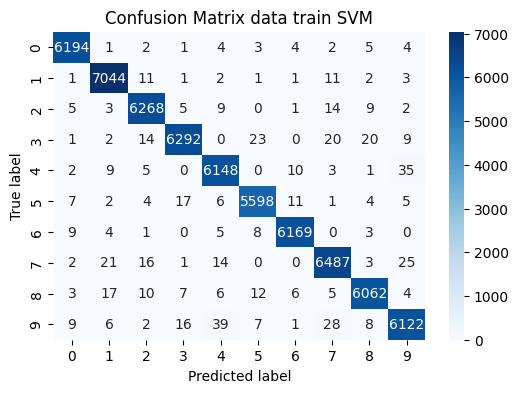

[[6194    1    2    1    4    3    4    2    5    4]
 [   1 7044   11    1    2    1    1   11    2    3]
 [   5    3 6268    5    9    0    1   14    9    2]
 [   1    2   14 6292    0   23    0   20   20    9]
 [   2    9    5    0 6148    0   10    3    1   35]
 [   7    2    4   17    6 5598   11    1    4    5]
 [   9    4    1    0    5    8 6169    0    3    0]
 [   2   21   16    1   14    0    0 6487    3   25]
 [   3   17   10    7    6   12    6    5 6062    4]
 [   9    6    2   16   39    7    1   28    8 6122]]


In [14]:
# confusion matrix untuk data train svm
train_confusion_matrix_svm = confusion_matrix(y_train, train_preds_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(train_confusion_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix data train SVM')
plt.show()
print(train_confusion_matrix_svm)

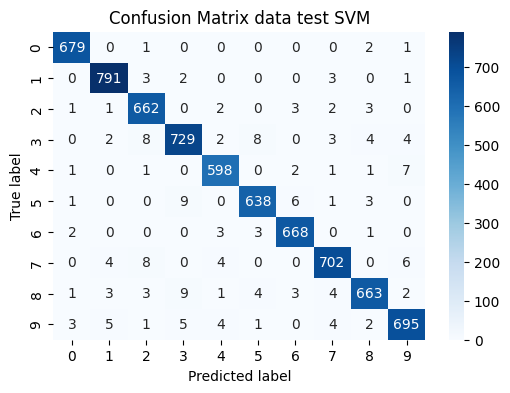

[[679   0   1   0   0   0   0   0   2   1]
 [  0 791   3   2   0   0   0   3   0   1]
 [  1   1 662   0   2   0   3   2   3   0]
 [  0   2   8 729   2   8   0   3   4   4]
 [  1   0   1   0 598   0   2   1   1   7]
 [  1   0   0   9   0 638   6   1   3   0]
 [  2   0   0   0   3   3 668   0   1   0]
 [  0   4   8   0   4   0   0 702   0   6]
 [  1   3   3   9   1   4   3   4 663   2]
 [  3   5   1   5   4   1   0   4   2 695]]


In [15]:
# confusion matrix untuk data test svm
test_confusion_matrix_svm = confusion_matrix(y_test, test_preds_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(test_confusion_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix data test SVM')
plt.show()
print(test_confusion_matrix_svm)

In [16]:
# evaluasi akurasi data train NB
train_accuracy_nb = accuracy_score(y_train, train_preds_nb)
# evalasi akurasi data test NB
test_accuracy_nb = accuracy_score(y_test, test_preds_nb)

# classification_report
train_report_nb = classification_report(y_train, train_preds_nb)
test_report_nb = classification_report(y_test, test_preds_nb)

print("Train Accuracy ", train_accuracy_nb)
print("Test Accuracy ", test_accuracy_nb)
print("Train Classification Report ")
print(train_report_nb)
print("Test Classification Report")
print(test_report_nb)

Train Accuracy  0.5604761904761905
Test Accuracy  0.5634285714285714
Train Classification Report 
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      6220
           1       0.81      0.94      0.87      7077
           2       0.88      0.31      0.46      6316
           3       0.75      0.36      0.49      6381
           4       0.84      0.14      0.24      6213
           5       0.60      0.05      0.09      5655
           6       0.62      0.95      0.75      6199
           7       0.90      0.30      0.45      6569
           8       0.29      0.64      0.40      6132
           9       0.38      0.95      0.54      6238

    accuracy                           0.56     63000
   macro avg       0.68      0.55      0.51     63000
weighted avg       0.69      0.56      0.52     63000

Test Classification Report
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       683
       

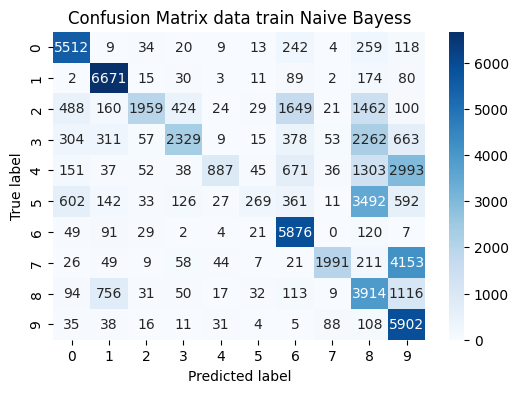

[[5512    9   34   20    9   13  242    4  259  118]
 [   2 6671   15   30    3   11   89    2  174   80]
 [ 488  160 1959  424   24   29 1649   21 1462  100]
 [ 304  311   57 2329    9   15  378   53 2262  663]
 [ 151   37   52   38  887   45  671   36 1303 2993]
 [ 602  142   33  126   27  269  361   11 3492  592]
 [  49   91   29    2    4   21 5876    0  120    7]
 [  26   49    9   58   44    7   21 1991  211 4153]
 [  94  756   31   50   17   32  113    9 3914 1116]
 [  35   38   16   11   31    4    5   88  108 5902]]


In [17]:
# confusion matrix untuk data train nb
train_confusion_matrix_nb = confusion_matrix(y_train, train_preds_nb)

plt.figure(figsize=(6, 4))
sns.heatmap(train_confusion_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix data train Naive Bayess')
plt.show()
print(train_confusion_matrix_nb)

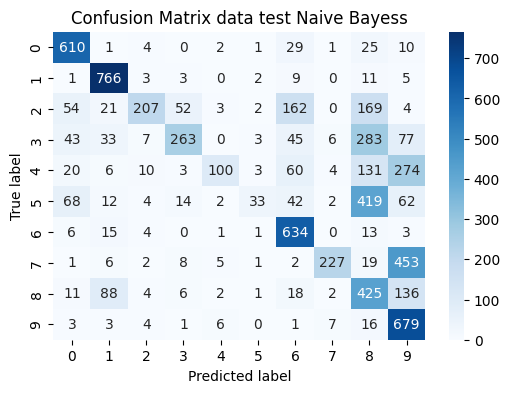

[[610   1   4   0   2   1  29   1  25  10]
 [  1 766   3   3   0   2   9   0  11   5]
 [ 54  21 207  52   3   2 162   0 169   4]
 [ 43  33   7 263   0   3  45   6 283  77]
 [ 20   6  10   3 100   3  60   4 131 274]
 [ 68  12   4  14   2  33  42   2 419  62]
 [  6  15   4   0   1   1 634   0  13   3]
 [  1   6   2   8   5   1   2 227  19 453]
 [ 11  88   4   6   2   1  18   2 425 136]
 [  3   3   4   1   6   0   1   7  16 679]]


In [18]:
# confusion matrix untuk data test nb
test_confusion_matrix_nb = confusion_matrix(y_test, test_preds_nb)

plt.figure(figsize=(6, 4))
sns.heatmap(test_confusion_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix data test Naive Bayess')
plt.show()
print(test_confusion_matrix_nb)

# 7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet03 sebagai acuan.

In [33]:
def show_images_with_predictions(model, X_test, y_test):
    # melakukan prediksi pada dataset pengujian (X_test)
    predictions = model.predict(X_test)

    fig, axes = plt.subplots(3, 5, figsize=(10, 7))

    # loop for untuk mengiterasi melalui semua subplot yang telah dibuat
    for i, ax in enumerate(axes.flat):
        image = X_test.iloc[i].values.reshape(28, 28)
        true_label = y_test.iloc[i]
        pred_label = predictions[i]

        # Mengatur warna teks menjadi merah jika True tidak sama dengan Prediksi
        if true_label != pred_label:
            title_color = 'red'
        else:
            title_color = 'blue'

        ax.imshow(image, cmap='gray')
        ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=title_color)
        ax.axis('off')

    plt.tight_layout()

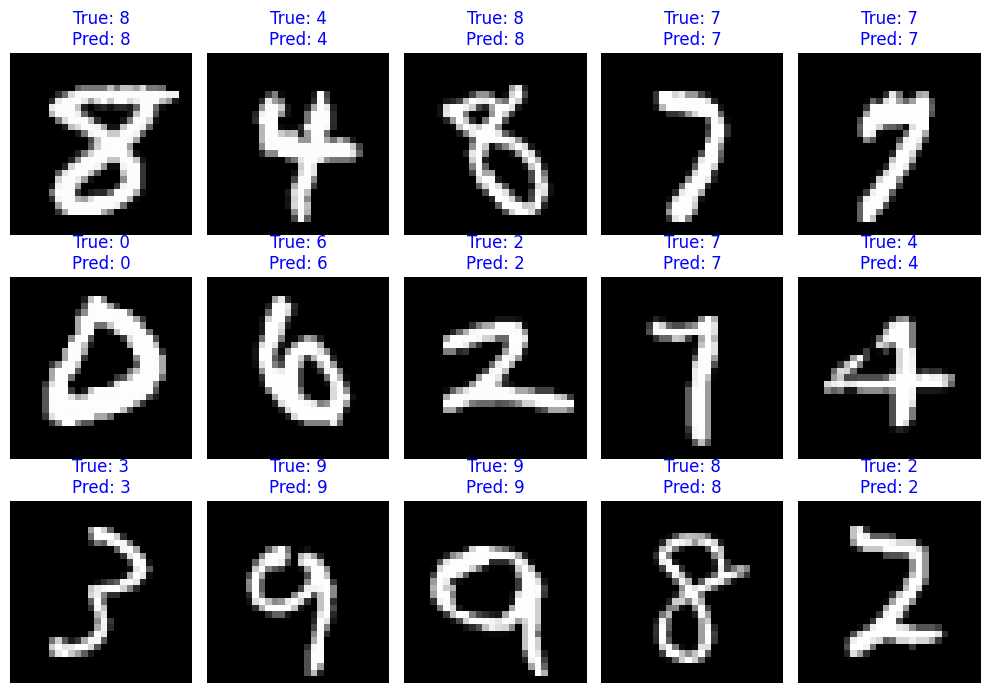

In [34]:
# menampilkan citra data testing algoritma SVM
show_images_with_predictions(svm, X_test, y_test)

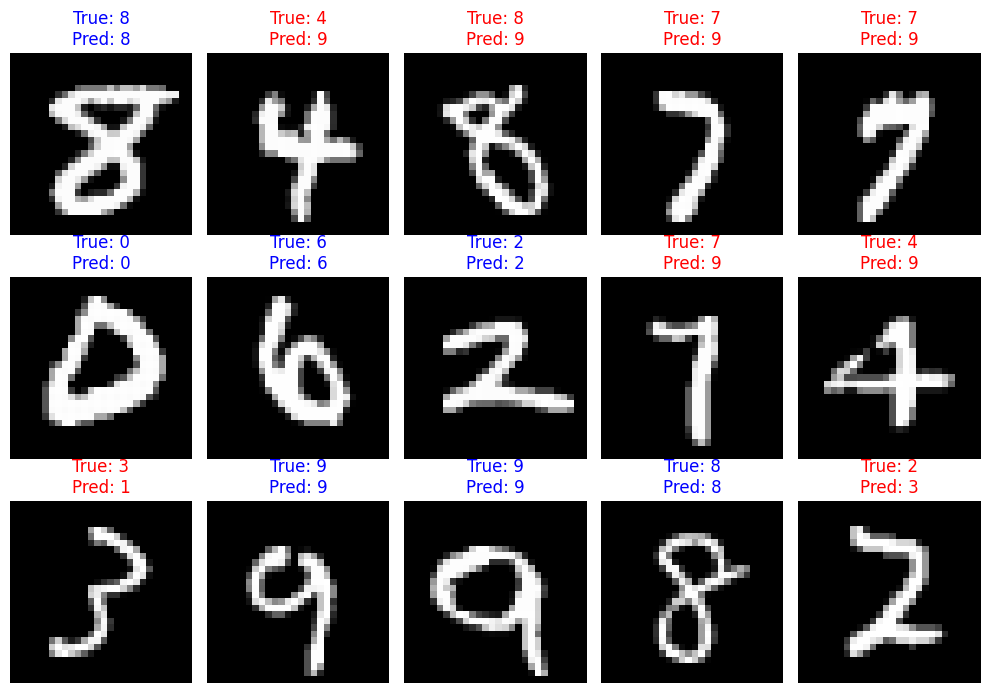

In [35]:
# menampilkan citra data testing algoritma Naive Bayess
show_images_with_predictions(nb, X_test, y_test)

# 8. Apa model terbaik yang Anda dapatkan? Bagaimana konfi gurasinya? Berapa tingkat akurasiyang didapatkan? Jelaskan!

In [ ]:
# menghitung akurasi dari model SVM
svm_accuracy = accuracy_score(y_test, test_preds_svm)

# menghitung akurasi dari model Naive Bayes
nb_accuracy = accuracy_score(y_test, test_preds_nb)

print(f'Akurasi SVM: {svm_accuracy * 100:.2f}%')
print(f'Akurasi Naive Bayes: {nb_accuracy * 100:.2f}%')

Akurasi SVM: 97.50%
Akurasi Naive Bayes: 56.34%
